In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data

In [21]:
X_ = pd.DataFrame(X)

In [22]:
X_.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = data.target

In [6]:
X.shape , y.shape

((569, 30), (569,))

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [33]:
mod = RandomForestClassifier(max_features=10,max_samples=260,oob_score=True)

In [34]:
mod.fit(X_train,y_train)

RandomForestClassifier(max_features=10, max_samples=260, oob_score=True)

In [35]:
y_pred = mod.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.98      0.98      0.98        50

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



In [37]:
accuracy_score(y_test,y_pred)

0.9767441860465116

[Text(0.6029411764705882, 0.9285714285714286, 'x[13] <= 29.345\ngini = 0.487\nsamples = 194\nvalue = [109, 151]'),
 Text(0.38235294117647056, 0.7857142857142857, 'x[7] <= 0.056\ngini = 0.208\nsamples = 113\nvalue = [18, 135]'),
 Text(0.23529411764705882, 0.6428571428571429, 'x[14] <= 0.003\ngini = 0.044\nsamples = 99\nvalue = [3, 131]'),
 Text(0.11764705882352941, 0.5, 'x[26] <= 0.195\ngini = 0.408\nsamples = 6\nvalue = [2, 5]'),
 Text(0.058823529411764705, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]'),
 Text(0.17647058823529413, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.35294117647058826, 0.5, 'x[20] <= 14.47\ngini = 0.016\nsamples = 93\nvalue = [1, 126]'),
 Text(0.29411764705882354, 0.35714285714285715, 'gini = 0.0\nsamples = 75\nvalue = [0, 102]'),
 Text(0.4117647058823529, 0.35714285714285715, 'x[21] <= 32.83\ngini = 0.077\nsamples = 18\nvalue = [1, 24]'),
 Text(0.35294117647058826, 0.21428571428571427, 'gini = 0.0\nsamples = 17\nval

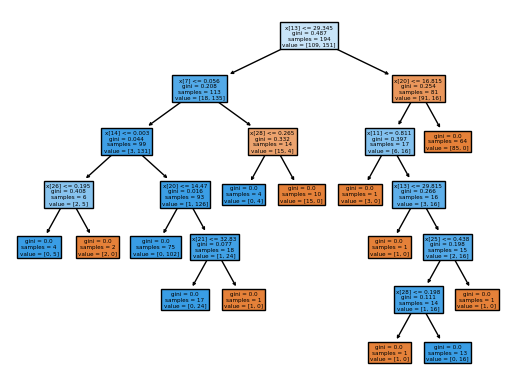

In [38]:
plot_tree(mod.estimators_[10],filled=True)

In [39]:
mod.oob_score_

0.9606625258799172